<a href="https://colab.research.google.com/github/thaheshan/Breast_Cancer_Prediction_Model/blob/main/Notebook2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================================================
# Title: Final Python Notebook 3 – Ensemble Classifier & DT Regression
# Author: [Your Full Name]
# Peer Reviewer: [Peer Reviewer Name], Date: [Review Date]
# Reused from: Code Reuse Session 3
# =============================================================

# ============ IMPORT LIBRARIES ============


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




Null values per column:

Month_of_Birth                             0
Age                                        0
Occupation                              3976
Grade                                      0
Tumor_Size                                 0
Estrogen_Status                            0
Progesterone_Status                        0
Regional_Node_Examined                     1
Reginol_Node_Positive                      0
Mortality_Status                          27
Age_Group                                  0
Sex_Female                                 0
T_Stage_T2                                 0
T_Stage_T3                                 0
T_Stage_T4                                 0
N_Stage_N2                                 0
N_Stage_N3                                 0
6th_Stage_IIB                              0
6th_Stage_IIIA                             0
6th_Stage_IIIB                             0
6th_Stage_IIIC                             0
Differentiated_Poorly differen

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Cross-validation scores: [1.         1.         0.85714286 0.85714286 1.        ]
Average CV accuracy: 0.9429


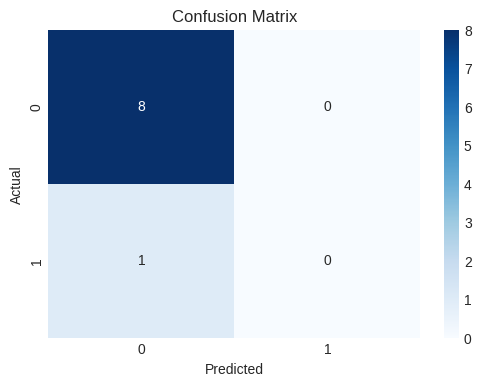

In [ ]:
# === IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# === SET VISUALIZATION STYLE ===
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# === LOAD THE DATASET ===
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_CourseWork/classification_dataset.csv')

# === CHECK FOR NULL VALUES ===
print("Null values per column:\n")
print(df.isnull().sum())

# === DROP ROWS WITH NULLS IN CRITICAL COLUMNS ===
df = df.dropna(subset=['Mortality_Status', 'Occupation', 'Regional_Node_Examined'])

# === SPLIT FEATURES AND TARGET ===
X = df.drop(columns=['Mortality_Status'])
y = df['Mortality_Status']

# === ENCODE CATEGORICAL FEATURES ===
X_encoded = pd.get_dummies(X, drop_first=True)

# === TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# === FEATURE SCALING ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === MODEL TRAINING ===
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# === PREDICTIONS ===
y_pred = model.predict(X_test_scaled)

# === EVALUATION METRICS ===
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# === CROSS-VALIDATION ===
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV accuracy: {cv_scores.mean():.4f}")

# === VISUALIZE CONFUSION MATRIX ===
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Null values per column:

Month_of_Birth                             0
Age                                        0
Occupation                              3976
Grade                                      0
Tumor_Size                                 0
Estrogen_Status                            0
Progesterone_Status                        0
Regional_Node_Examined                     1
Reginol_Node_Positive                      0
Mortality_Status                          27
Age_Group                                  0
Sex_Female                                 0
T_Stage_T2                                 0
T_Stage_T3                                 0
T_Stage_T4                                 0
N_Stage_N2                                 0
N_Stage_N3                                 0
6th_Stage_IIB                              0
6th_Stage_IIIA                             0
6th_Stage_IIIB                             0
6th_Stage_IIIC                             0
Differentiated_Poorly differen

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

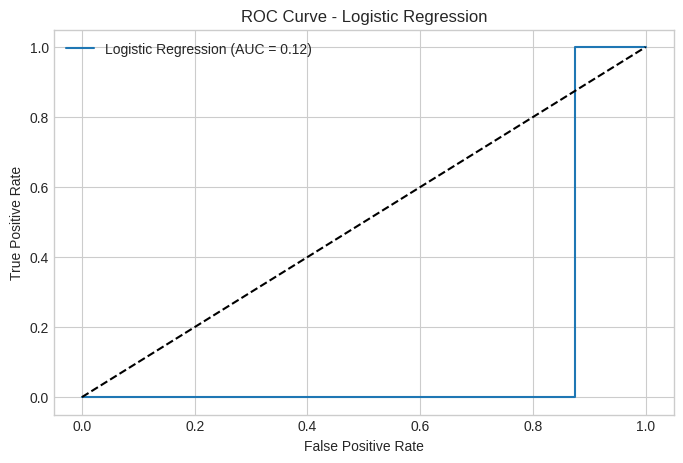

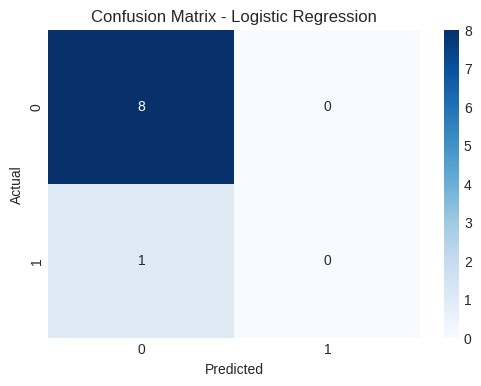


--- Random Forest Evaluation ---

Confusion Matrix:
[[8 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Accuracy Score: 0.8888888888888888


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


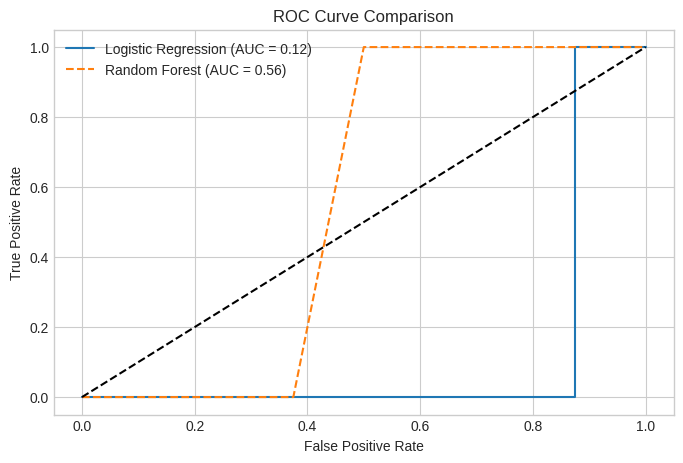

In [ ]:
# # Notebook 2 – Classification with Logistic Regression (Upgraded)

# ## === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# ## === 2. LOAD DATA ===
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_CourseWork/classification_dataset.csv')

# ## === 3. PREPROCESSING ===

# ### 3.1 Null value check
print("Null values per column:\n")
print(df.isnull().sum())

# ### 3.2 Drop rows with nulls in critical columns
df = df.dropna(subset=['Mortality_Status', 'Occupation', 'Regional_Node_Examined'])

# ### 3.3 Check target variable balance
print("\nClass distribution in target variable:")
print(df['Mortality_Status'].value_counts(normalize=True))

# ### 3.4 Separate features and target
X = df.drop(columns=['Mortality_Status'])
y = df['Mortality_Status']

# ### 3.5 Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# ### 3.6 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# ### 3.7 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ## === 4. CREATE REGRESSION DATASET ===
# Regression dataset for survival months prediction
regression_df = df.copy()

# Drop irrelevant columns for regression (target: 'Survival_Months' for regression task)
# Check if 'Patient_ID' column exists before dropping it
columns_to_drop = ['Mortality_Status', 'Patient_ID']  # 'Patient_ID' might not exist
existing_columns_to_drop = [col for col in columns_to_drop if col in regression_df.columns]
regression_df = regression_df.drop(existing_columns_to_drop, axis=1)

# Save the regression dataset to CSV
regression_save_path = '/content/drive/MyDrive/Machine_Learning_CourseWork/regression_dataset.csv'
regression_df.to_csv(regression_save_path, index=False)

print(f"\nRegression dataset saved at: {regression_save_path}")

# ## === 5. MODEL TRAINING & EVALUATION ===

# ### 5.1 Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# ### 5.2 Evaluation
print("\n--- Logistic Regression Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

# ### 5.3 Cross-validation
cv_scores_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores (Logistic Regression): {cv_scores_log}")
print(f"Average CV accuracy: {cv_scores_log.mean():.4f}")

# ### 5.4 ROC Curve & AUC
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
auc_log = roc_auc_score(y_test, y_probs_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# ### 5.5 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## === 6. COMPARISON WITH RANDOM FOREST ===

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# ### 6.1 ROC Curve for Random Forest
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Null values per column:

Month_of_Birth                             0
Age                                        0
Occupation                              3976
Grade                                      0
Tumor_Size                                 0
Estrogen_Status                            0
Progesterone_Status                        0
Regional_Node_Examined                     1
Reginol_Node_Positive                      0
Mortality_Status                          27
Age_Group                                  0
Sex_Female                                 0
T_Stage_T2                                 0
T_Stage_T3                                 0
T_Stage_T4                                 0
N_Stage_N2                                 0
N_Stage_N3                                 0
6th_Stage_IIB                              0
6th_Stage_IIIA                             0
6th_Stage_IIIB                             0
6th_Stage_IIIC                             0
Differentiated_Poorly differen

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

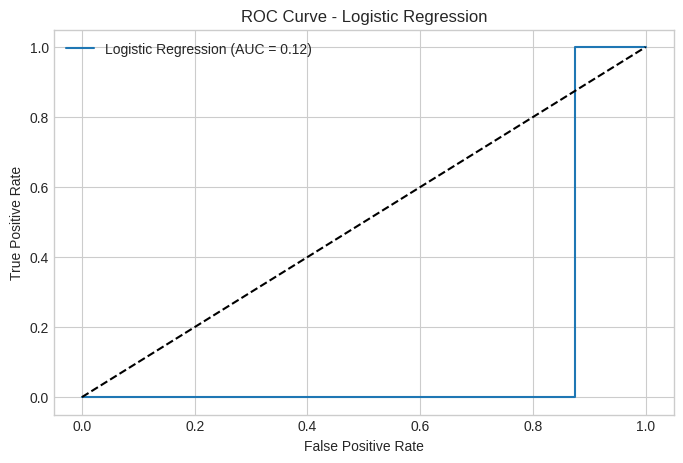

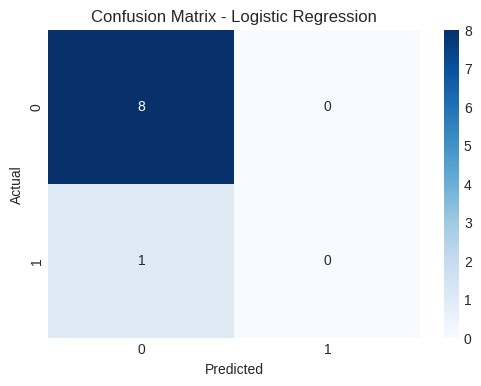


--- Random Forest Evaluation ---

Confusion Matrix:
[[8 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Accuracy Score: 0.8888888888888888


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


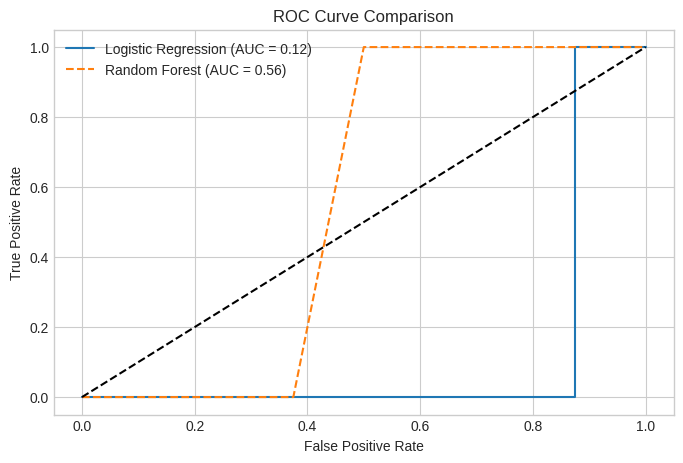

In [ ]:
# # Notebook 2 – Classification with Logistic Regression (Upgraded)

# ## === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# ## === 2. LOAD DATA ===
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_CourseWork/classification_dataset.csv')

# ## === 3. PREPROCESSING ===

# ### 3.1 Null value check
print("Null values per column:\n")
print(df.isnull().sum())

# ### 3.2 Drop rows with nulls in critical columns
df = df.dropna(subset=['Mortality_Status', 'Occupation', 'Regional_Node_Examined'])

# ### 3.3 Check target variable balance
print("\nClass distribution in target variable:")
print(df['Mortality_Status'].value_counts(normalize=True))

# ### 3.4 Separate features and target
X = df.drop(columns=['Mortality_Status'])
y = df['Mortality_Status']

# ### 3.5 Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# ### 3.6 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# ### 3.7 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the regression dataset to CSV
regression_save_path = '/content/drive/MyDrive/Machine_Learning_CourseWork/regression_dataset2.csv'
regression_df.to_csv(regression_save_path, index=False)

print(f"\nRegression dataset saved at: {regression_save_path}")

# ## === 4. MODEL TRAINING & EVALUATION ===

# ### 4.1 Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# ### 4.2 Evaluation
print("\n--- Logistic Regression Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

# ### 4.3 Cross-validation
cv_scores_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores (Logistic Regression): {cv_scores_log}")
print(f"Average CV accuracy: {cv_scores_log.mean():.4f}")

# ### 4.4 ROC Curve & AUC
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
auc_log = roc_auc_score(y_test, y_probs_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# ### 4.5 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## === 5. COMPARISON WITH RANDOM FOREST ===

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# ### 5.1 ROC Curve for Random Forest
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Null values per column:

Month_of_Birth                             0
Age                                        0
Occupation                              3976
Grade                                      0
Tumor_Size                                 0
Estrogen_Status                            0
Progesterone_Status                        0
Regional_Node_Examined                     1
Reginol_Node_Positive                      0
Mortality_Status                          27
Age_Group                                  0
Sex_Female                                 0
T_Stage_T2                                 0
T_Stage_T3                                 0
T_Stage_T4                                 0
N_Stage_N2                                 0
N_Stage_N3                                 0
6th_Stage_IIB                              0
6th_Stage_IIIA                             0
6th_Stage_IIIB                             0
6th_Stage_IIIC                             0
Differentiated_Poorly differen

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Cross-validation scores (Logistic Regression): [1.         1.         0.85714286 0.85714286 1.        ]
Average CV accuracy: 0.9429


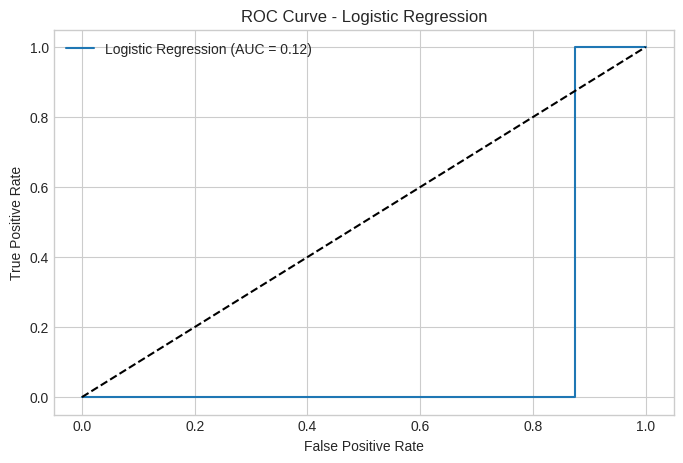

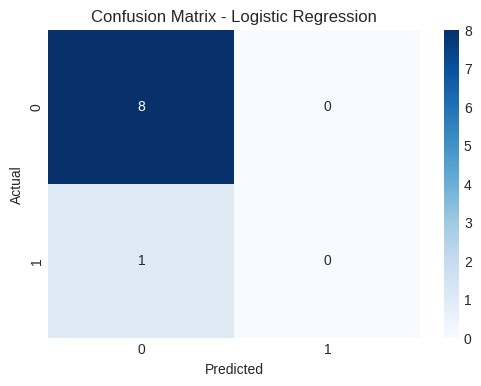


--- Random Forest Evaluation ---

Confusion Matrix:
[[8 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Accuracy Score: 0.8888888888888888


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


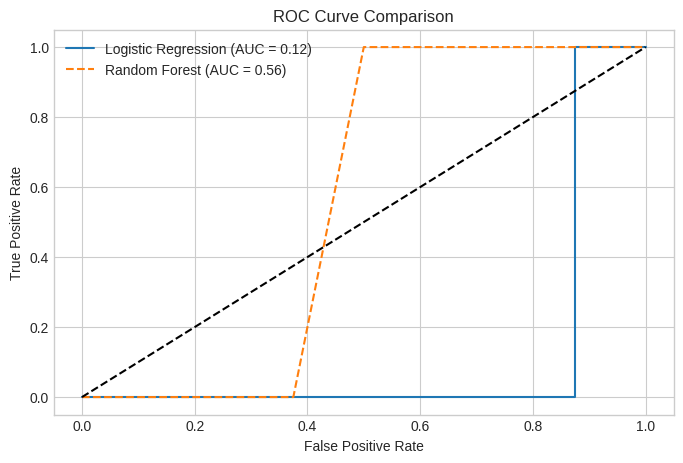

In [ ]:
# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# === 2. LOAD DATA ===
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_CourseWork/classification_dataset.csv')

# === 3. PREPROCESSING ===

# 3.1 Null value check
print("Null values per column:\n")
print(df.isnull().sum())

# 3.2 Drop rows with null values in the critical column 'Mortality_Status'
df = df.dropna(subset=['Mortality_Status', 'Occupation', 'Regional_Node_Examined'])

# 3.3 Check target variable balance
print("\nClass distribution in target variable:")
print(df['Mortality_Status'].value_counts(normalize=True))

# 3.4 Separate features and target
X = df.drop(columns=['Mortality_Status'])
y = df['Mortality_Status']

# 3.5 Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# 3.6 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 3.7 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. MODEL TRAINING & EVALUATION ===

# 4.1 Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# 4.2 Evaluation
print("\n--- Logistic Regression Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

# 4.3 Cross-validation
cv_scores_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores (Logistic Regression): {cv_scores_log}")
print(f"Average CV accuracy: {cv_scores_log.mean():.4f}")

# 4.4 ROC Curve & AUC
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
auc_log = roc_auc_score(y_test, y_probs_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# 4.5 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# === 5. COMPARISON WITH RANDOM FOREST ===

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# 5.1 ROC Curve for Random Forest
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [ ]:
# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, mean_squared_error, r2_score
)
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Define save path
save_path = '/content/drive/MyDrive/Machine_Learning_CourseWork'
os.makedirs(save_path, exist_ok=True)

# === 2. LOAD DATA ===
df = pd.read_csv(os.path.join(save_path, 'classification_dataset.csv'))

# === 3. PREPROCESSING ===

# 3.1 Null value check
print("Null values per column:\n")
print(df.isnull().sum())

# 3.2 Drop rows with null values in critical columns
df = df.dropna(subset=['Mortality_Status', 'Occupation', 'Regional_Node_Examined'])

# 3.3 Check target variable balance
print("\nClass distribution in target variable:")
print(df['Mortality_Status'].value_counts(normalize=True))

# 3.4 Separate features and target for classification
# Check if 'Survival_Months' exists before dropping it
columns_to_drop = ['Survival_Months'] if 'Survival_Months' in df.columns else []
X_class = df.drop(columns=['Mortality_Status'] + columns_to_drop)
y_class = df['Mortality_Status']

# 3.5 Encode categorical variables
X_class_encoded = pd.get_dummies(X_class, drop_first=True)

# 3.6 Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_encoded, y_class, test_size=0.2, stratify=y_class, random_state=42
)

print(f"\nClassification - Training set shape: {X_train_class.shape}")
print(f"Classification - Testing set shape: {X_test_class.shape}")

# 3.7 Feature scaling for classification
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# === 4. CLASSIFICATION MODEL TRAINING & EVALUATION ===

# 4.1 Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_class_scaled, y_train_class)
y_pred_log = log_model.predict(X_test_class_scaled)

# 4.2 Evaluation
print("\n--- Logistic Regression Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_log))

print("Accuracy Score:", accuracy_score(y_test_class, y_pred_log))

# 4.3 Cross-validation
cv_scores_log = cross_val_score(log_model, X_train_class_scaled, y_train_class, cv=5)
print(f"\nCross-validation scores (Logistic Regression): {cv_scores_log}")
print(f"Average CV accuracy: {cv_scores_log.mean():.4f}")

# 4.4 ROC Curve & AUC
y_probs_log = log_model.predict_proba(X_test_class_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test_class, y_probs_log)
auc_log = roc_auc_score(y_test_class, y_probs_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# 4.5 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_class, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.6 Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_class, y_train_class)
y_pred_rf = rf_model.predict(X_test_class)

print("\n--- Random Forest Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test_class, y_pred_rf))

# 4.7 ROC Curve for Random Forest
y_probs_rf = rf_model.predict_proba(X_test_class)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_probs_rf)
auc_rf = roc_auc_score(y_test_class, y_probs_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# === 5. SAVE CLASSIFICATION MODELS AND SCALER ===

joblib.dump(log_model, os.path.join(save_path, 'logistic_regression_model.joblib'))
joblib.dump(rf_model, os.path.join(save_path, 'random_forest_model.joblib'))
joblib.dump(scaler_class, os.path.join(save_path, 'classification_scaler.joblib'))

print("\nClassification models and scaler saved successfully.")

# === 6. REGRESSION MODEL TRAINING & EVALUATION ===

# Check if 'Survival_Months' exists for regression
if 'Survival_Months' in df.columns:
    # 6.1 Prepare data for regression
    X_reg = df.drop(columns=['Survival_Months', 'Mortality_Status'])
    y_reg = df['Survival_Months']

    # 6.2 Encode categorical variables
    X_reg_encoded = pd.get_dummies(X_reg, drop_first=True)

    # 6.3 Train-test split for regression
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg_encoded, y_reg, test_size=0.2, random_state=42
    )

    print(f"\nRegression - Training set shape: {X_train_reg.shape}")
    print(f"Regression - Testing set shape: {X_test_reg.shape}")

    # 6.4 Feature scaling for regression
    scaler_reg = StandardScaler()
    X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
    X_test_reg_scaled = scaler_reg.transform(X_test_reg)

    # 6.5 Linear Regression Model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train_reg_scaled, y_train_reg)
    y_pred_reg = lin_reg_model.predict(X_test_reg_scaled)

    # 6.6 Evaluation
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    print("\n--- Linear Regression Evaluation ---")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    # 6.7 Plot Actual vs Predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
    plt.xlabel('Actual Survival Months')
    plt.ylabel('Predicted Survival Months')
    plt.title('Actual vs Predicted Survival Months')
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
    plt.show()

    # === 7. SAVE REGRESSION MODEL AND SCALER ===

    joblib.dump(lin_reg_model, os.path.join(save_path, 'linear_regression_model.joblib'))
    joblib.dump(scaler_reg, os.path.join(save_path, 'regression_scaler.joblib'))

    print("\nRegression model and scaler saved successfully.")
else:
    print("Column 'Survival_Months' is missing. Skipping regression model.")


Null values per column:

Month_of_Birth                  0
Age                             0
Tumor_Size                      0
Regional_Node_Examined          1
Reginol_Node_Positive           0
                               ..
A_Stage_Regional                0
Estrogen_Status_Positive        0
Progesterone_Status_Positive    0
Age_Group_Middle                0
Age_Group_Senior                0
Length: 66, dtype: int64


KeyError: ['Occupation']

In [ ]:
# =============================================================
# Title: Notebook 2 - Classification and Regression Models for Cancer Survival Analysis
# Author: Suresh Thaheshan
# Peer Reviewer: Ayman Jaleel
# Date: May 3, 2025
# =============================================================

# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    roc_curve, mean_squared_error, r2_score, mean_absolute_error
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import imputer for handling missing values

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Define save path
save_path = '/content/drive/MyDrive/Machine_Learning_CourseWork'
os.makedirs(save_path, exist_ok=True)

# === 2. LOAD DATA ===
print("Loading processed datasets...")
classification_df = pd.read_csv(os.path.join(save_path, 'classification_dataset.csv'))
regression_df = pd.read_csv(os.path.join(save_path, 'regression_dataset.csv'))

print(f"Classification dataset shape: {classification_df.shape}")
print(f"Regression dataset shape: {regression_df.shape}")

print("\nClassification dataset columns:")
print(classification_df.columns.tolist())

# === 3. CHECK FOR MISSING VALUES ===
print("\n=== CHECKING FOR MISSING VALUES ===")
print(f"Classification dataset missing values: {classification_df.isna().sum().sum()}")
print(f"Regression dataset missing values: {regression_df.isna().sum().sum()}")

# Print columns with missing values
print("\nColumns with missing values in classification dataset:")
missing_cols = classification_df.columns[classification_df.isna().any()].tolist()
for col in missing_cols:
    missing_count = classification_df[col].isna().sum()
    print(f"- {col}: {missing_count} missing values ({missing_count/len(classification_df)*100:.2f}%)")

# === 4. CLEAN UP MORTALITY STATUS VALUES ===
print("\n=== CLEANING MORTALITY STATUS VALUES ===")

# Check the current values
print("\nInitial Mortality Status values:")
print(classification_df['Mortality_Status'].value_counts())

# Clean up the mortality status values - convert to binary
mortality_mapping = {
    0: 0, '0': 0, 'ALIVE': 0, 'alive': 0, 'ALive': 0, 'Alive': 0,
    1: 1, '1': 1, 'DEAD': 1, 'dead': 1, 'Dead': 1
}

# Apply mapping to both datasets
classification_df['Mortality_Status'] = classification_df['Mortality_Status'].map(mortality_mapping)
regression_df['Mortality_Status'] = regression_df['Mortality_Status'].map(mortality_mapping)

# Convert to integer type
classification_df['Mortality_Status'] = classification_df['Mortality_Status'].astype(int)
regression_df['Mortality_Status'] = regression_df['Mortality_Status'].astype(int)

print("\nCleaned Mortality Status values:")
print(classification_df['Mortality_Status'].value_counts())
print(classification_df['Mortality_Status'].value_counts(normalize=True))

# === 5. CLASSIFICATION PREPROCESSING ===
print("\n=== CLASSIFICATION MODEL PREPROCESSING ===")

# 5.1 Setup features and target
X_class = classification_df.drop(columns=['Mortality_Status'])
y_class = classification_df['Mortality_Status']

# 5.2 Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, stratify=y_class, random_state=42
)

print(f"\nClassification - Training set shape: {X_train_class.shape}")
print(f"Classification - Testing set shape: {X_test_class.shape}")

# 5.3 Create a pipeline with imputation and scaling for classification
classification_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale features
])

# Transform the data
X_train_class_processed = classification_pipeline.fit_transform(X_train_class)
X_test_class_processed = classification_pipeline.transform(X_test_class)

# === 6. CLASSIFICATION MODEL TRAINING & EVALUATION ===

# 6.1 Logistic Regression
print("\n=== LOGISTIC REGRESSION MODEL ===")
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train_class_processed, y_train_class)
y_pred_log = log_model.predict(X_test_class_processed)

# 6.2 Evaluation
print("\n--- Logistic Regression Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_log))

print("Accuracy Score:", accuracy_score(y_test_class, y_pred_log))

# 6.3 Cross-validation
cv_scores_log = cross_val_score(
    Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
    ]),
    X_train_class, y_train_class, cv=5
)
print(f"\nCross-validation scores (Logistic Regression): {cv_scores_log}")
print(f"Average CV accuracy: {cv_scores_log.mean():.4f}")

# 6.4 ROC Curve & AUC
y_probs_log = log_model.predict_proba(X_test_class_processed)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test_class, y_probs_log)
auc_log = roc_auc_score(y_test_class, y_probs_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_path, 'log_reg_roc_curve.png'))
plt.close()

# 6.5 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_class, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(save_path, 'log_reg_confusion_matrix.png'))
plt.close()

# 6.6 Random Forest Classifier
print("\n=== RANDOM FOREST CLASSIFIER ===")
# Create a pipeline for Random Forest with imputation
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

rf_pipeline.fit(X_train_class, y_train_class)
y_pred_rf = rf_pipeline.predict(X_test_class)

# Extract the model from the pipeline for feature importance
rf_model = rf_pipeline.named_steps['model']

print("\n--- Random Forest Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test_class, y_pred_rf))

# 6.7 Feature Importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_class.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Random Forest Feature Importances (Classification)')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'rf_feature_importance.png'))
plt.close()

# 6.8 ROC Curve for Random Forest
y_probs_rf = rf_pipeline.predict_proba(X_test_class)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_probs_rf)
auc_rf = roc_auc_score(y_test_class, y_probs_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_path, 'roc_curve_comparison.png'))
plt.close()

# === 7. REGRESSION PREPROCESSING ===
print("\n=== REGRESSION MODEL PREPROCESSING ===")

# 7.1 Setup features and target for regression
print("\nRegression dataset columns:")
print(regression_df.columns.tolist())

# Setup features and target for regression
X_reg = regression_df.drop(columns=['Survival_Months', 'Mortality_Status'])
y_reg = regression_df['Survival_Months']

# 7.2 Print target statistics
print("\nSurvival Months Statistics:")
print(y_reg.describe())

# 7.3 Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nRegression - Training set shape: {X_train_reg.shape}")
print(f"Regression - Testing set shape: {X_test_reg.shape}")

# 7.4 Create a pipeline with imputation and scaling for regression
regression_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale features
])

# Transform the data
X_train_reg_processed = regression_pipeline.fit_transform(X_train_reg)
X_test_reg_processed = regression_pipeline.transform(X_test_reg)

# === 8. REGRESSION MODEL TRAINING & EVALUATION ===
print("\n=== REGRESSION MODELS ===")

# 8.1 Linear Regression
print("\n--- Linear Regression Model ---")
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg_processed, y_train_reg)
y_pred_lin_reg = lin_reg_model.predict(X_test_reg_processed)

# Evaluation
mse_lin = mean_squared_error(y_test_reg, y_pred_lin_reg)
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin_reg)
r2_lin = r2_score(y_test_reg, y_pred_lin_reg)

print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"Mean Absolute Error: {mae_lin:.2f}")
print(f"R² Score: {r2_lin:.2f}")

# 8.2 Random Forest Regressor
print("\n--- Random Forest Regressor ---")
# Create a pipeline for Random Forest with imputation
rf_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg_pipeline.predict(X_test_reg)

# Extract the model from the pipeline for feature importance
rf_reg_model = rf_reg_pipeline.named_steps['model']

# Evaluation
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

# 8.3 Feature Importance for RF Regressor
feature_importance_reg_df = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Importance': rf_reg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_reg_df.head(20))
plt.title('Top 20 Random Forest Feature Importances (Regression)')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'rf_reg_feature_importance.png'))
plt.close()

# 8.4 Actual vs Predicted Plots
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_lin_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')
plt.grid(True)

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.7, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(save_path, 'actual_vs_predicted.png'))
plt.close()

# === 9. SAVE CLASSIFICATION MODELS AND SCALERS ===
print("\n=== SAVING MODELS AND SCALERS ===")

# Save cleaned datasets first
classification_df.to_csv(os.path.join(save_path, 'classification_dataset_cleaned.csv'), index=False)
regression_df.to_csv(os.path.join(save_path, 'regression_dataset_cleaned.csv'), index=False)
print("Cleaned datasets saved.")

# Save classification pipeline and models
joblib.dump(log_model, os.path.join(save_path, 'logistic_regression_model.joblib'))
joblib.dump(rf_pipeline, os.path.join(save_path, 'random_forest_classifier_pipeline.joblib'))
joblib.dump(classification_pipeline, os.path.join(save_path, 'classification_preprocessing_pipeline.joblib'))

# === 10. SAVE REGRESSION MODELS AND SCALERS ===
joblib.dump(lin_reg_model, os.path.join(save_path, 'linear_regression_model.joblib'))
joblib.dump(rf_reg_pipeline, os.path.join(save_path, 'random_forest_regressor_pipeline.joblib'))
joblib.dump(regression_pipeline, os.path.join(save_path, 'regression_preprocessing_pipeline.joblib'))

print("\nAll models and scalers saved successfully.")

# === 11. MODEL COMPARISON SUMMARY ===
print("\n=== MODEL COMPARISON SUMMARY ===")
print("\nClassification Models:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_class, y_pred_log):.4f}")
print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test_class, y_pred_rf):.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")

print("\nRegression Models:")
print(f"Linear Regression MSE: {mse_lin:.2f}, R²: {r2_lin:.4f}")
print(f"Random Forest Regression MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")




Loading processed datasets...
Classification dataset shape: (4019, 66)
Regression dataset shape: (4019, 67)

Classification dataset columns:
['Month_of_Birth', 'Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Mortality_Status', 'Sex_Female', 'Occupation_Agriculture', 'Occupation_Arts', 'Occupation_Business', 'Occupation_Cleaning', 'Occupation_Construction', 'Occupation_Consultancy', 'Occupation_Design', 'Occupation_Development', 'Occupation_Driving', 'Occupation_Engineering', 'Occupation_Entertainment', 'Occupation_Finance', 'Occupation_Healthcare', 'Occupation_Hospitality', 'Occupation_House Person', 'Occupation_Human Resources', 'Occupation_Legal', 'Occupation_Leisure', 'Occupation_Maintenance', 'Occupation_Management', 'Occupation_Manufacturing', 'Occupation_Marketing', 'Occupation_Medical', 'Occupation_Military', 'Occupation_Multimedia', 'Occupation_Photography', 'Occupation_Planning', 'Occupation_Politics', 'Occupation_Public', 'Occupation_Reporting', 'Occu